<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab09_Matrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matrices 

1. **Modelo de población de una especie de pajaros** 
Se estudiará un modelo de crecimiento de la poblacion para una especie de pájaros. En esta población se supone que el número de pajaros hembras es igual al número de machos.  Sea :
- $p_{j,n-1}$ la poblacion juvenil (inmadura) de hembras en el año (n-1) 
- $p_{a,n-1}$ el numero de hembras adultas en el mismo año.

Algunos de los pájaros jóvenes morirán  durante el año. Se suponen que cierta proporción de pájaros $\alpha$ de los pájaros jovenes sobrevivirán para llegar a adultos en la primavera del año $n$. Cada hembra que sobrevive prdocuce huevos en la primavera, los incupan y producen, en promedio, $k$ pájaros hembras jóvenes en al siguiente primavera. Los adultos también mueren y la proporcion de adultos que sobrevive de una primavera a la siguiente es $\beta$.

Un modelo para el crecimiento poblacional de pajaros 
\begin{equation}
p_{j,n} = kp_{a, n-1}
\end{equation}


\begin{equation}
p_{a,n} =\alpha p_{j,n-1} + \beta p_{a, n-1}
\end{equation}

Que puede ser escrita como ${\bf p_n}=A{\bf p_{n-1}}$, Siendo A la matrix definida en las ecuaciones anteriores, y ${\bf p_n}$ un vector. Para la evolución temporal se cumple que: 

- ${\bf p_1}=A{\bf p_{0}}$, ${\bf p_2}=A{\bf p_{1}}= A(A{\bf p_0})=A^2{\bf p_{0}}$ $...$ y asi sucesivamente. Entonces:

\begin{equation}
{\bf p_n} = A^n {\bf p_{0}}
\end{equation}


Supongamos que tenemos 10 hembras  (y 10 machos) adultos y no hay jovenes, la supongmaos que la matriz A viene dada por:

\begin{bmatrix} 
0 & 2 \\
0.3 & 0.5 
\end{bmatrix}

para la primera poblacion $p_{j,1}=20$, $p_{a,1}=5$, el total de hembras es 25 y la razón jovenes adultas es de 4 a 1. Muestre que la razon $p_{j,n}/p_{a,n}$ converge $1.88$,(como no se puede tener un número racional de pájaros,. aproxime siempre el resultados al menor entero).

- Para la  solución general del modelo del problema de valores y vetores propios
se tiene que:
\begin{equation}
p_n=\lambda_1^n\left [ a_1 \vec{v}_1 +\left( \frac{\lambda_2}{\lambda_1} \right)^n \right]a_2 \vec{v}_2
\end{equation}

Asumiendo que $\lambda_2/ \lambda_1 < 1$, entonces $(\lambda_2/ \lambda_1)^n << 1$ cuando n crece.  Entonce spara n grande se cumple que:

donde $p_n=a_1\lambda_1^n\vec{v}_1$


donde:

${\bf p_0} = a_1 \vec{v}_1 + a_2 \vec{v}_2$, con $v_1$ y $v_2$ vectores propios de A



In [82]:
#@title Solución

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import Matrix, symbols
import sympy as sp

In [84]:
a =  [0, 2]
b =  [0.3 , 0.5]

A = np.array([a,b])

A

array([[0. , 2. ],
       [0.3, 0.5]])

In [85]:
p_0 = np.array([0,10])
p_0

array([ 0, 10])

In [86]:
n = 10

for i in range(n):

  A_n = np.linalg.matrix_power(A,i)

  p_0 = np.array([0,10])

  pn = A_n @ p_0

  conver = pn[0] / pn[1]

conver

1.8893187644808815

In [87]:
vectores = np.linalg.eig(A)[1]
vectores

array([[-0.96246998, -0.88285203],
       [ 0.27138816, -0.46965125]])

In [88]:
v1 = vectores[:,0]
v2 = vectores[:,1]

print(v1,v2)

[-0.96246998  0.27138816] [-0.88285203 -0.46965125]


In [89]:
#Encontrar las constantes a1 y a2 que son la combinacion lineal quue forman P0

In [90]:
p_0

array([ 0, 10])

In [91]:
a_ = np.array([[v1[0],v2[0]],[v1[1], v2[1]]])
a_

array([[-0.96246998, -0.88285203],
       [ 0.27138816, -0.46965125]])

In [92]:
a_ = vectores

In [93]:
b_ = p_0

In [94]:
np.linalg.solve(a_, b_)

array([ 12.76497195, -13.91615122])

In [95]:
a1 = np.linalg.solve(a_, b_)[0]
a2 = np.linalg.solve(a_, b_)[1]

In [96]:
a1

12.76497194950322

In [97]:
a2

-13.916151217678744

In [98]:
valores = np.linalg.eig(A)[0]
valores

array([-0.56394103,  1.06394103])

In [99]:
lambda1 = valores[0]
lambda2 = valores[1]

In [100]:
lambda1

-0.5639410298049854

In [101]:
lambda2

1.0639410298049854

In [102]:
n = 10

for i in range(n):
  
  uno = a1 * v1
  
  dos = (lambda2 / lambda1) ** i

  tres = uno + dos

  cuatro = ((lambda1 ** i) * tres) * a2 *v2

cuatro

array([22.33254505, 11.28639702])

In [103]:
cuatro[0] / cuatro[1]

1.9787134021845982

In [104]:
print('La población de hembras jovenes es de', int(cuatro[0]))
print('La población de hembras y machos adultos es de', int(cuatro[1]))

La población de hembras jovenes es de 22
La población de hembras y machos adultos es de 11


2. **Modelo de encriptación** 

Un proceso para encriptar un mensaje secreto es usar cierta matrix cuadrada cuyos elementos son enteros con elementos enteros en la inversa. Se recibe un mensaje, se asigna un número a cada letra Por ejemplo, A=1, B=2, C=3, ... etc y espacio=27), se arreglan los números en una matriz de izquierda a derecha en cada fila, donde el número de elementos en la fila es igual al tamano de la matriz de codigo, se multiplica esa matriz por la matriz de código por la derecha, se transcribe el mensaje en una cadena de números y se manda el mensaje. 

La persona que debe recibir el mensaje conoce la matriz de codigo. El o ellla arrelgan el mensaje encriptado en una matriz de izquierda a derecha en cada fila, en donde el numero de elementos en una fila conicide con el tamano de la matriz de codigo muplicada por la derecha, por el inverso de la matriz de código y puede leer mensaje decodificado.

Usted a recibido el siguiente mensaje que fue encriptado usando la matriz A. Decodifiquelo.

```
matrix([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])

```

Mensaje

47,49,-19,257,487,10,-9,63,137,236, 79,142,-184,372,536,59,70,-40,332,588, 

la primera fila del mensaje es 47,49,-19,257,487

¿Cual es el mensaje?


In [105]:
#decodificacion

In [106]:
A = np.array([[ 1,  2, -3,  4,  5],
        [-2, -5,  8, -8, -9],
        [ 1,  2, -2,  7,  9],
        [ 1,  1,  0,  6, 12],
        [ 2,  4, -6,  8, 11]])
A

array([[ 1,  2, -3,  4,  5],
       [-2, -5,  8, -8, -9],
       [ 1,  2, -2,  7,  9],
       [ 1,  1,  0,  6, 12],
       [ 2,  4, -6,  8, 11]])

In [107]:
A_inv = np.linalg.inv(A)
print(A_inv)

[[ 14.   1.  -2.   1.  -5.]
 [ 22.  -7.  -4.   6. -19.]
 [ 13.  -3.  -2.   3. -10.]
 [ -2.   1.   1.  -1.   2.]
 [ -2.  -0.  -0.  -0.   1.]]


In [108]:
#mensaje encriptado

B = np.array([[47,49,-19,257,487],
             [10,-9,63,137,236],
             [79,142,-184,372,536],
             [59,70,-40,332,588]])
B

array([[  47,   49,  -19,  257,  487],
       [  10,   -9,   63,  137,  236],
       [  79,  142, -184,  372,  536],
       [  59,   70,  -40,  332,  588]])

In [109]:
#Multiplicamos

decodificado = B @ A_inv
decodificado

array([[ 1., 18.,  5., 27., 25.],
       [15., 21., 27.,  8.,  1.],
       [22.,  9., 14.,  7., 27.],
       [ 6., 21., 14., 27., 27.]])

In [110]:
#Pasamos la matriz a una sola dimension

DECO = np.array([1., 18., 5., 27., 25.,15., 21., 27.,  8.,  1., 22.,  9., 14.,  7., 27., 6., 21., 14., 27., 27.])

DECO = np.round(DECO).astype(int)

print(DECO)

[ 1 18  5 27 25 15 21 27  8  1 22  9 14  7 27  6 21 14 27 27]


In [111]:
codigo = {
    1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E',
    6: 'F', 7: 'G', 8: 'H', 9: 'I', 10: 'J',
    11: 'K', 12: 'L', 13: 'M', 14: 'N', 15: 'O',
    16: 'P', 17: 'Q', 18: 'R', 19: 'S', 20: 'T',
    21: 'U', 22: 'V', 23: 'W', 24: 'X', 25: 'Y',
    26: 'Z', 27: ' '}

letras = [codigo[numero] for numero in DECO]
print(letras)

['A', 'R', 'E', ' ', 'Y', 'O', 'U', ' ', 'H', 'A', 'V', 'I', 'N', 'G', ' ', 'F', 'U', 'N', ' ', ' ']


In [112]:
texto = ''.join(letras)
print("El mensaje encriptado es:", texto)

El mensaje encriptado es: ARE YOU HAVING FUN  



3. **Diagonalización**.

Se sabe que un sistema físico es gobernado por las ecuaciones,



$$
\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-1z, \\
z' &=& 2x&+y&+3z,
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.<br> 
a) Diagonalize $A$.<br> 

b) Use el hecho de que $f(A) =U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.<br>.
c) Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$.<br> 
d) Compare el resultado a la solución analítica,

$$
\begin{align}
2x & = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})), \\
2y & = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})), \\
2z & = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
\end{align}
$$

In [129]:
A_ = np.array([[2, -1, 1],
              [0, 3, -1],
              [2, 1, 3]])
print(A_)

[[ 2 -1  1]
 [ 0  3 -1]
 [ 2  1  3]]


In [132]:
auto_v_A = np.linalg.eigh(A_)
auto_v_A

(array([0.29072464, 2.80606343, 4.90321193]),
 array([[ 0.73923874,  0.42713229, -0.52065737],
        [ 0.23319198, -0.88765034, -0.39711255],
        [-0.63178128,  0.17214786, -0.75578934]]))

In [133]:
P = auto_v_A[1]

print("Autovectores:", P)

Autovectores: [[ 0.73923874  0.42713229 -0.52065737]
 [ 0.23319198 -0.88765034 -0.39711255]
 [-0.63178128  0.17214786 -0.75578934]]


In [134]:
D = auto_v_A[0]

print("Autovalores:", D)

Autovalores: [0.29072464 2.80606343 4.90321193]


In [135]:
P_INV = np.linalg.inv(P)
P_INV 

array([[ 0.73923874,  0.23319198, -0.63178128],
       [ 0.42713229, -0.88765034,  0.17214786],
       [-0.52065737, -0.39711255, -0.75578934]])

In [136]:
diago = P_INV @ A_ @ P
diago

array([[ 0.88002995,  0.44864015,  1.20475776],
       [-0.95135138,  3.41729185, -0.84931171],
       [-0.70930501, -0.23580749,  3.7026782 ]])

In [148]:
U = P
U_inv = P_INV
D_1 = diago

In [155]:
D_ = np.diag(D)

In [156]:
def solucion(t_fin, r_0):
  
    t = np.linspace(0, t_fin, 100)  
    r = np.zeros((len(t), 3))

    for i, t in enumerate(t):
        expo = np.exp(D_*t) 
        f_D = (expo @ r_0)
        r_ = U @ (expo @ U_inv @ r_0)
        r[i] = r_

    return r

In [145]:
r_0 = np.array([1, 1, 2])
t = np.linspace(0, 2, 100)

In [169]:
sol = solucion(2, r_0)
sol_x = sol[:,0]
sol_y = sol[:,1]
sol_z = sol[:,2]

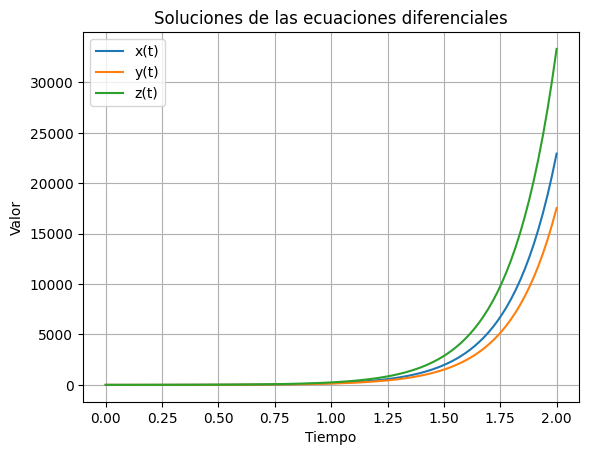

In [170]:
# Graficar
plt.plot(t, sol_x, label='x(t)')
plt.plot(t, sol_y, label='y(t)')
plt.plot(t, sol_z, label='z(t)')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Soluciones de las ecuaciones diferenciales')
plt.legend()
plt.grid()

In [173]:
# Comparar con la solución analítica
x_t = r_0[0] * (np.exp(2*t) * (1 + np.exp(2*t) - 2*t))
y_t = r_0[0] * (-2*t * np.exp(2*t)) + r_0[1] * (2*(t + 1) * np.exp(2*t))
z_t = r_0[0] * (np.exp(2*t) * (-1 + np.exp(2*t) + 2*t)) + r_0[1] * (2*t * np.exp(2*t)) + r_0[2] * (np.exp(2*t) * (1 + np.exp(2*t)))

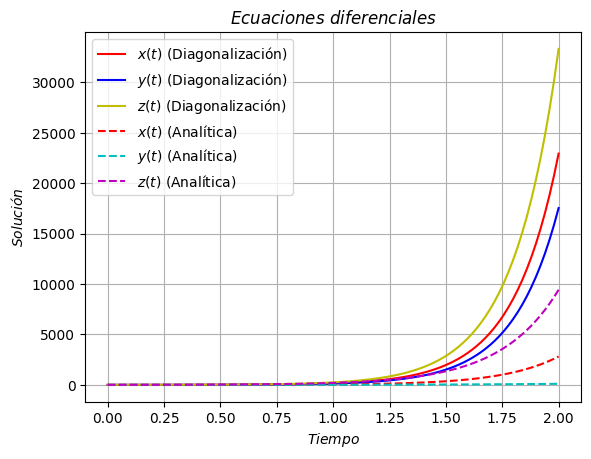

In [182]:
# Graficar la comparación
plt.plot(t, sol_x, 'r', label='$x(t)$ (Diagonalización)')
plt.plot(t, sol_y, 'b',label='$y(t)$ (Diagonalización)')
plt.plot(t, sol_z, 'y',label='$z(t)$ (Diagonalización)')
plt.plot(t, x_t, 'r--', label='$x(t)$ (Analítica)')
plt.plot(t, y_t, 'c--', label='$y(t)$ (Analítica)')
plt.plot(t, z_t, 'm--', label='$z(t)$ (Analítica)')
plt.title('$Ecuaciones$ $diferenciales$')
plt.legend()
plt.xlabel('$Tiempo$')
plt.ylabel('$Solución$')
plt.grid()